# Project Title: Uber Rides and weather

### Team: Pablo Crespo, Victoria Wise, Trushil Patel, Steve Moss (Group 5)

## Project Description: 

#    - If weather plays an impact on Uber Rides in New York 
    
### Research Questions: 

1)  What are some findings on the commuter habits   

2)  Does weather impact on number of Uber Rides request  

3)  Time of the day that has the most Uber Rides request 

4)  Time of the week that has the most Uber Rides request

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import seaborn as sns
import os
import datetime

# Import API key
from weather_api import weather_api_key

In [2]:
#### USED: https://stackoverflow.com/questions/55452835/creating-a-data-set-using-an-api-with-python

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

In [3]:
city="New York"
start_date="2014-07-01"
end_date="2014-10-01"
date_format = "%Y-%m-%d"

start_date = datetime.datetime.strptime(start_date, date_format)
end_date = datetime.datetime.strptime(end_date, date_format)

In [4]:
all_data = []
date_list=[]
maxtempC_list = []
avgtempC_list = []
mintempC_list = []
uvIndex_list =[]
precipMM_list=[]
weatherDesc_list=[]
cloudcover_list=[]
humidity_list=[]

print(f"Retrieving information from {start_date} to {end_date}.\n")

for each_date in daterange(start_date, end_date):
#     print(each_date.date())

    ask = str(each_date.date())

    request = requests.get(
        "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?",
        params=dict(
            key=weather_api_key,
            q=city,
            format='json',
            date=ask,
            tp='24'
        )
    )
    json_data = request.json()
#     print(json_data)

    all_data.append(json_data)
    date_list.append(json_data['data']['weather'][0]['date'])
    maxtempC_list.append(json_data['data']['weather'][0]['maxtempC'])
    avgtempC_list.append(json_data['data']['weather'][0]['avgtempC'])
    mintempC_list.append(json_data['data']['weather'][0]['mintempC'])
    uvIndex_list.append(json_data['data']['weather'][0]['uvIndex'])
    precipMM_list.append(json_data['data']['weather'][0]['hourly'][0]['precipMM'])
    weatherDesc_list.append(json_data['data']['weather'][0]['hourly'][0]['weatherDesc'][0]['value'])
    cloudcover_list.append(json_data['data']['weather'][0]['hourly'][0]['cloudcover'])
    humidity_list.append(json_data['data']['weather'][0]['hourly'][0]['humidity'])
    
    print(f"{request}: COMPLETE ---> {json_data['data']['weather'][0]['date']}")
                                    
    

Retrieving information from 2014-07-01 00:00:00 to 2014-10-01 00:00:00.

<Response [200]>: COMPLETE ---> 2014-07-01
<Response [200]>: COMPLETE ---> 2014-07-02
<Response [200]>: COMPLETE ---> 2014-07-03
<Response [200]>: COMPLETE ---> 2014-07-04
<Response [200]>: COMPLETE ---> 2014-07-05
<Response [200]>: COMPLETE ---> 2014-07-06
<Response [200]>: COMPLETE ---> 2014-07-07
<Response [200]>: COMPLETE ---> 2014-07-08
<Response [200]>: COMPLETE ---> 2014-07-09
<Response [200]>: COMPLETE ---> 2014-07-10
<Response [200]>: COMPLETE ---> 2014-07-11
<Response [200]>: COMPLETE ---> 2014-07-12
<Response [200]>: COMPLETE ---> 2014-07-13
<Response [200]>: COMPLETE ---> 2014-07-14
<Response [200]>: COMPLETE ---> 2014-07-15
<Response [200]>: COMPLETE ---> 2014-07-16
<Response [200]>: COMPLETE ---> 2014-07-17
<Response [200]>: COMPLETE ---> 2014-07-18
<Response [200]>: COMPLETE ---> 2014-07-19
<Response [200]>: COMPLETE ---> 2014-07-20
<Response [200]>: COMPLETE ---> 2014-07-21
<Response [200]>: COMPLE

In [5]:
# create a data frame from date, maxtemp, avgtemp, uvIndex
weather_dict = {
    'date': date_list,
    "maxtempC": maxtempC_list,
    "avgtempC": avgtempC_list,
    "uvIndex": uvIndex_list,
    "precipMM":precipMM_list,
    "cloudcover":cloudcover_list,
    "humidity":humidity_list,
    "weatherDesc":weatherDesc_list    
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,date,maxtempC,avgtempC,uvIndex,precipMM,cloudcover,humidity,weatherDesc
0,2014-07-01,29,26,6,6.0,30,86,Moderate or heavy rain shower
1,2014-07-02,29,27,6,15.7,28,89,Moderate or heavy rain shower
2,2014-07-03,30,27,6,34.0,38,89,Torrential rain shower
3,2014-07-04,21,20,4,17.1,43,89,Moderate or heavy rain shower
4,2014-07-05,26,23,6,0.0,4,63,Sunny
...,...,...,...,...,...,...,...,...
87,2014-09-26,27,21,6,0.0,4,74,Sunny
88,2014-09-27,30,24,6,0.0,0,78,Sunny
89,2014-09-28,26,24,6,0.0,12,75,Sunny
90,2014-09-29,25,22,5,0.1,51,68,Overcast


In [6]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         92 non-null     object
 1   maxtempC     92 non-null     object
 2   avgtempC     92 non-null     object
 3   uvIndex      92 non-null     object
 4   precipMM     92 non-null     object
 5   cloudcover   92 non-null     object
 6   humidity     92 non-null     object
 7   weatherDesc  92 non-null     object
dtypes: object(8)
memory usage: 5.9+ KB


In [7]:
# data3.Title = data3.Title.str.replace(',', '').astype(float).astype(int)
for index,column in enumerate(weather_data):
    if (index!=0) & (index!=7):
        weather_data[column]= weather_data[column].astype(float)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         92 non-null     object 
 1   maxtempC     92 non-null     float64
 2   avgtempC     92 non-null     float64
 3   uvIndex      92 non-null     float64
 4   precipMM     92 non-null     float64
 5   cloudcover   92 non-null     float64
 6   humidity     92 non-null     float64
 7   weatherDesc  92 non-null     object 
dtypes: float64(6), object(2)
memory usage: 5.9+ KB


In [8]:
# # overwriting data after changing format
# data["Time"]= pd.to_datetime(data["Time"])
# # info of data
# data.info()
# # display
# data

weather_data["date"]=pd.to_datetime(weather_data["date"])
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         92 non-null     datetime64[ns]
 1   maxtempC     92 non-null     float64       
 2   avgtempC     92 non-null     float64       
 3   uvIndex      92 non-null     float64       
 4   precipMM     92 non-null     float64       
 5   cloudcover   92 non-null     float64       
 6   humidity     92 non-null     float64       
 7   weatherDesc  92 non-null     object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 5.9+ KB


In [9]:
# P: Saving weather_data to a csv file

weather_data.to_csv("Data/weather_data.csv", encoding = "utf-8", index = False, header = True)

## Cleaning the uber data

In [10]:
# Find and reference Input csv File from Uber folder

# P: List of files to read
files_name = [
    "other-American_B01362",
    "other-Carmel_B00256",
    "other-Diplo_B01196",
    "other-Federal_02216",
    "other-Firstclass_B01536",
    "other-Highclass_B01717",
    "other-Prestige_B01338",
    "other-Skyline_B00111"    
]

# P: Shortcut name to refer to each file
key_name = [
    "American",
    "Carmel",
    "Diplo",
    "Federal",
    "Firstclass",
    "Highclass",
    "Prestige",
    "Skyline"    
]

# P: The 9 files will be saved in 1 dictionary (uber_dict). The key for each file will be the shortcut name saved in
#    in the list 'key_name'. Example: To display the data frame of the file "other-Firstclass_B01536.csv" type:
#    uber_dict["Firstclass"]

uber_dict = {}

for index, file in enumerate(files_name):
    
    file_path = f"Uber_Rides_Rawdata/Uber/{file}.csv"

# P: I found that the files have different encoder so I had to use the try-except functions.
    try:
        uber_dict[key_name[index]] = pd.read_csv(file_path, encoding = "utf-8")
        print(f"GOOD | FILE: {file} | ENCODING: utf-8")
    except UnicodeDecodeError:
        try:
            uber_dict[key_name[index]] = pd.read_csv(file_path, encoding = "cp1252")
            print(f"GOOD | FILE: {file} | ENCODING: cp1252")
        except:
            print("ERROR")

GOOD | FILE: other-American_B01362 | ENCODING: utf-8
GOOD | FILE: other-Carmel_B00256 | ENCODING: cp1252
GOOD | FILE: other-Diplo_B01196 | ENCODING: cp1252
GOOD | FILE: other-Federal_02216 | ENCODING: utf-8
GOOD | FILE: other-Firstclass_B01536 | ENCODING: cp1252
GOOD | FILE: other-Highclass_B01717 | ENCODING: cp1252
GOOD | FILE: other-Prestige_B01338 | ENCODING: cp1252
GOOD | FILE: other-Skyline_B00111 | ENCODING: utf-8


In [11]:
print("Columns before cleaning\n")
for key in uber_dict:
    for index, column in enumerate(uber_dict[key]):
        print(key, index, column)
    
column_date = "date"
column_time = "TIME"
column_pickup = "PU_ADDRESS"


for key in uber_dict:
    for index, column in enumerate(uber_dict[key]):
        if index == 0:
            uber_dict[key] = uber_dict[key].rename(columns = {column: column_date})
        elif index == 1:
            uber_dict[key] = uber_dict[key].rename(columns = {column: column_time})
        elif index == 2:
            uber_dict[key] = uber_dict[key].rename(columns = {column: column_pickup})
            
    uber_dict[key] = uber_dict[key][[column_date, column_time, column_pickup]]
    uber_dict[key][column_date] = pd.to_datetime(uber_dict[key][column_date])
    
print("\n\nColumns after cleaning\n")
for key in uber_dict:
    for index, column in enumerate(uber_dict[key]):
        print(key, index, column)

Columns before cleaning

American 0 DATE
American 1 TIME
American 2 PICK UP ADDRESS
American 3 Unnamed: 3
American 4 Unnamed: 4
American 5 Unnamed: 5
Carmel 0 Date
Carmel 1 Time
Carmel 2 PU_Adress
Carmel 3 Base_No
Diplo 0 Date
Diplo 1 Time
Diplo 2 PU_Address
Federal 0 Date
Federal 1 Time
Federal 2 PU_Address
Federal 3 DO_Address
Federal 4 Routing Details
Federal 5 PU_Address.1
Federal 6 Status
Firstclass 0 DATE
Firstclass 1 TIME
Firstclass 2 PICK UP ADDRESS
Highclass 0 DATE
Highclass 1 TIME
Highclass 2 PU_Address
Prestige 0 DATE
Prestige 1 TIME
Prestige 2 PICK UP ADDRESS
Skyline 0 Date
Skyline 1 Time
Skyline 2     Street_Address 
Skyline 3     City_State 
Skyline 4 Unnamed: 4
Skyline 5 Unnamed: 5


Columns after cleaning

American 0 date
American 1 TIME
American 2 PU_ADDRESS
Carmel 0 date
Carmel 1 TIME
Carmel 2 PU_ADDRESS
Diplo 0 date
Diplo 1 TIME
Diplo 2 PU_ADDRESS
Federal 0 date
Federal 1 TIME
Federal 2 PU_ADDRESS
Firstclass 0 date
Firstclass 1 TIME
Firstclass 2 PU_ADDRESS
Highclass 

In [12]:
for index, key in enumerate(uber_dict):
    if index == 0:
        
        merged_df = uber_dict[key].groupby(column_date).count().copy().reset_index()
    else:
#         pass
        merged_df = merged_df.merge(uber_dict[key].groupby(column_date).count().reset_index(), on = column_date, how = "outer", suffixes = (f"_{key_name[index-1]}", f"_{key_name[index]}"))
        

In [13]:
merged_df

,date,TIME_American,PU_ADDRESS_American,TIME_Carmel,PU_ADDRESS_Carmel,TIME_Diplo,PU_ADDRESS_Diplo,TIME_Federal,PU_ADDRESS_Federal,TIME_Firstclass,PU_ADDRESS_Firstclass,TIME_Highclass,PU_ADDRESS_Highclass,TIME_Prestige,PU_ADDRESS_Prestige,TIME_Skyline,PU_ADDRESS_Skyline
0,2014-07-01,921,921,2871,2871,1046,1046,11.0,11.0,1744,1744,1368,1368,3345,3345,1668,1668
1,2014-07-02,1028,1028,2965,2965,1275,1275,4.0,4.0,2228,2228,1661,1661,3533,3533,1691,1691
2,2014-07-03,1068,1068,3361,3361,1200,1200,12.0,12.0,2121,2121,1599,1599,3649,3649,1157,1157
3,2014-07-04,1008,1008,2174,2174,1171,1171,8.0,8.0,1459,1459,1622,1622,3401,3401,337,337
4,2014-07-05,1214,1214,1846,1846,1371,1371,3.0,3.0,1703,1703,1898,1898,4081,4081,276,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2014-09-26,1101,1101,2816,2816,1055,1055,1.0,1.0,1934,1934,1801,1801,3598,3598,1477,1477
88,2014-09-27,1291,1291,2240,2240,1301,1301,2.0,2.0,1917,1917,2072,2072,4297,4297,561,561
89,2014-09-28,1080,1080,2559,2559,1260,1260,1.0,1.0,1831,1831,2032,2032,3985,3985,633,633
90,2014-09-29,772,772,3225,3225,972,972,NaN,NaN,1868,1868,1558,1558,3215,3215,1846,1846


In [14]:
# merged_df = merged_df.set_index(column_date)
for column in merged_df:
    for value in key_name:
        if column == f"{column_pickup}_{value}":
            merged_df = merged_df.drop(column, axis = 1)
        elif column == f"{column_time}_{value}":
            merged_df = merged_df.rename(columns = {column: f"count_{value}"})
            

merged_df = merged_df.fillna(0)
merged_df["count_Federal"] = merged_df["count_Federal"].astype(int)
merged_df

,date,count_American,count_Carmel,count_Diplo,count_Federal,count_Firstclass,count_Highclass,count_Prestige,count_Skyline
0,2014-07-01,921,2871,1046,11,1744,1368,3345,1668
1,2014-07-02,1028,2965,1275,4,2228,1661,3533,1691
2,2014-07-03,1068,3361,1200,12,2121,1599,3649,1157
3,2014-07-04,1008,2174,1171,8,1459,1622,3401,337
4,2014-07-05,1214,1846,1371,3,1703,1898,4081,276
...,...,...,...,...,...,...,...,...,...
87,2014-09-26,1101,2816,1055,1,1934,1801,3598,1477
88,2014-09-27,1291,2240,1301,2,1917,2072,4297,561
89,2014-09-28,1080,2559,1260,1,1831,2032,3985,633
90,2014-09-29,772,3225,972,0,1868,1558,3215,1846


In [15]:
merged_df = merged_df.set_index(column_date)
merged_df["Total"] = merged_df.sum(axis = 1)
merged_df = merged_df.reset_index()
merged_df

,date,count_American,count_Carmel,count_Diplo,count_Federal,count_Firstclass,count_Highclass,count_Prestige,count_Skyline,Total
0,2014-07-01,921,2871,1046,11,1744,1368,3345,1668,12974
1,2014-07-02,1028,2965,1275,4,2228,1661,3533,1691,14385
2,2014-07-03,1068,3361,1200,12,2121,1599,3649,1157,14167
3,2014-07-04,1008,2174,1171,8,1459,1622,3401,337,11180
4,2014-07-05,1214,1846,1371,3,1703,1898,4081,276,12392
...,...,...,...,...,...,...,...,...,...,...
87,2014-09-26,1101,2816,1055,1,1934,1801,3598,1477,13783
88,2014-09-27,1291,2240,1301,2,1917,2072,4297,561,13681
89,2014-09-28,1080,2559,1260,1,1831,2032,3985,633,13381
90,2014-09-29,772,3225,972,0,1868,1558,3215,1846,13456


In [16]:
# P: Saving rides data (merged_df) to a csv file

merged_df.to_csv("Data/rides_data.csv", encoding = "utf-8", index = False, header = True)

In [29]:
weather_rides_df = merged_df.copy()
weather_rides_df = weather_rides_df.merge(weather_data, left_on = "date", right_on = column_date, how = "outer")

weather_rides_df["Weekday"] = weather_rides_df[column_date].dt.weekday

days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
days_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weather_rides_df["Weekday"] = weather_rides_df["Weekday"].map(days)

        

In [18]:
weather_rides_df

,date,count_American,count_Carmel,count_Diplo,count_Federal,count_Firstclass,count_Highclass,count_Prestige,count_Skyline,Total,maxtempC,avgtempC,uvIndex,precipMM,cloudcover,humidity,weatherDesc,Weekday
0,2014-07-01,921,2871,1046,11,1744,1368,3345,1668,12974,29.0,26.0,6.0,6.0,30.0,86.0,Moderate or heavy rain shower,Tuesday
1,2014-07-02,1028,2965,1275,4,2228,1661,3533,1691,14385,29.0,27.0,6.0,15.7,28.0,89.0,Moderate or heavy rain shower,Wednesday
2,2014-07-03,1068,3361,1200,12,2121,1599,3649,1157,14167,30.0,27.0,6.0,34.0,38.0,89.0,Torrential rain shower,Thursday
3,2014-07-04,1008,2174,1171,8,1459,1622,3401,337,11180,21.0,20.0,4.0,17.1,43.0,89.0,Moderate or heavy rain shower,Friday
4,2014-07-05,1214,1846,1371,3,1703,1898,4081,276,12392,26.0,23.0,6.0,0.0,4.0,63.0,Sunny,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2014-09-26,1101,2816,1055,1,1934,1801,3598,1477,13783,27.0,21.0,6.0,0.0,4.0,74.0,Sunny,Friday
88,2014-09-27,1291,2240,1301,2,1917,2072,4297,561,13681,30.0,24.0,6.0,0.0,0.0,78.0,Sunny,Saturday
89,2014-09-28,1080,2559,1260,1,1831,2032,3985,633,13381,26.0,24.0,6.0,0.0,12.0,75.0,Sunny,Sunday
90,2014-09-29,772,3225,972,0,1868,1558,3215,1846,13456,25.0,22.0,5.0,0.1,51.0,68.0,Overcast,Monday


In [19]:
# P: Saving merged df (weather and rides) to a csv file

weather_rides_df.to_csv("Data/weather_rides_df.csv", encoding = "utf-8", index = False, header = True)

## Plotting

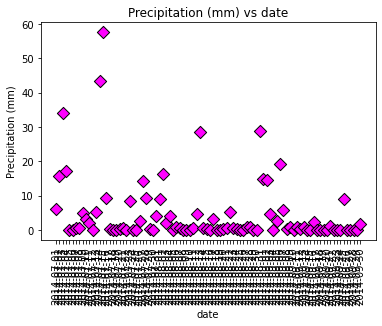

In [20]:
x_values = weather_data['date']
y_values = weather_data['precipMM']
plt.scatter(x_values,y_values, 
            s=75,
            marker="D",
            color="fuchsia",
            edgecolors="black")
plt.xlabel('date')
plt.ylabel('time')
# plt.ylim(xx, xx)
# plt.xlim(-xx,xx)
# plt.grid(which='major', linestyle='-')
# plt.grid(which='minor', linestyle=':')
plt.title("Precipitation (mm) vs date")
plt.xlabel("date")
plt.ylabel("Precipitation (mm)")
plt.xticks(x_values, rotation=90)
plt.rcParams["axes.labelsize"] = 2
plt.show()

In [31]:
groupby_weekday_sum = weather_rides_df[["count_American", "count_Carmel", "count_Diplo", "count_Federal", "count_Firstclass", "count_Highclass", "count_Prestige", "count_Skyline", "Total", "Weekday"]].groupby("Weekday").sum().reset_index()
# print(groupby_weekday_sum)
groupby_weekday_average = weather_rides_df[["maxtempC", "avgtempC", "uvIndex", "precipMM", "cloudcover", "humidity", "weatherDesc", "Weekday"]].groupby("Weekday").mean().reset_index()
# print(groupby_weekday_average)

weekday_df = groupby_weekday_sum.copy()
weekday_df = weekday_df.merge(groupby_weekday_average, on = "Weekday", how = "outer", suffixes = (f"_sum", f"_mean")).set_index("Weekday")
weekday_df = weekday_df.reindex(days_list)

for index, column in enumerate(weekday_df):
    if index <= 8:
        if index == 8:
            weekday_df = weekday_df.rename(columns = {column: f"sum_Total"})
        else:
            weekday_df = weekday_df.rename(columns = {column: f"sum_{key_name[index]}"})
    else:
        weekday_df = weekday_df.rename(columns = {column: f"avg_{column}"})


weekday_df.to_csv("Data/weekday_df.csv", encoding = "utf-8", index = True, header = True)

weekday_df

,sum_American,sum_Carmel,sum_Diplo,sum_Federal,sum_Firstclass,sum_Highclass,sum_Prestige,sum_Skyline,sum_Total,avg_maxtempC,avg_avgtempC,avg_uvIndex,avg_precipMM,avg_cloudcover,avg_humidity
Weekday,,,,,,,,,,,,,,,
Monday,11055,39139,12507,41,22960,19930,41316,20396,167344,26.615385,23.461538,5.615385,5.700000,20.692308,76.000000
Tuesday,12011,39347,13226,36,24718,20261,43591,25924,179114,25.785714,23.000000,5.714286,6.300000,27.357143,78.928571
Wednesday,11373,38394,12448,31,23782,18890,40733,25434,171085,27.000000,24.000000,5.769231,5.707692,21.538462,76.461538
Thursday,11844,41859,12432,48,23734,19246,41735,24638,175536,25.384615,22.769231,5.461538,4.200000,25.692308,74.461538
Friday,14366,38267,14642,47,25381,22740,48317,17867,181627,25.846154,22.153846,5.384615,2.807692,23.307692,75.076923
Saturday,16552,28321,17127,43,24227,25897,54289,6404,172860,25.692308,22.923077,5.538462,3.038462,31.230769,76.461538
Sunday,14511,31192,16168,30,21967,24961,50660,7033,166522,25.923077,23.153846,5.538462,4.723077,32.076923,78.538462


<AxesSubplot:label='f3d5acca-8493-4ab8-baa6-75be910643a0'>

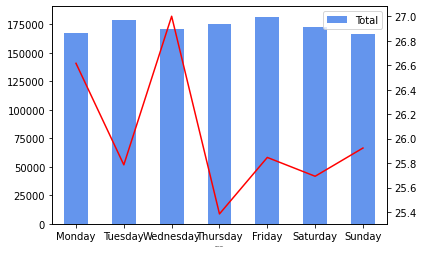

In [22]:
weekday_df[['Total']].plot(kind='bar', color=['cornflowerblue'], label= "Total number of rides per day")
weekday_df['maxtempC'].plot(color=['red'], secondary_y=True, label = "Max temperature of the day")

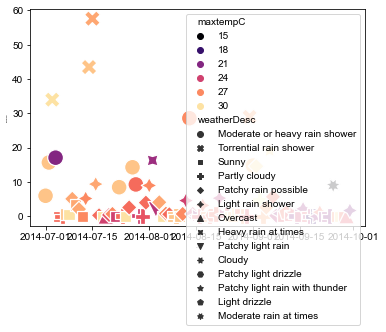

In [23]:
# Seaborn scatter plot
sns.scatterplot(data=weather_data, x="date", y="precipMM", hue="maxtempC", style="weatherDesc", s=250, palette="magma")
sns.set(rc={"figure.figsize":(15, 15)})
sns.set(style = "whitegrid")
plt.savefig("Figures/rain_date.png")
# plt.axis('equal') style="weatherDesc",
plt.show()

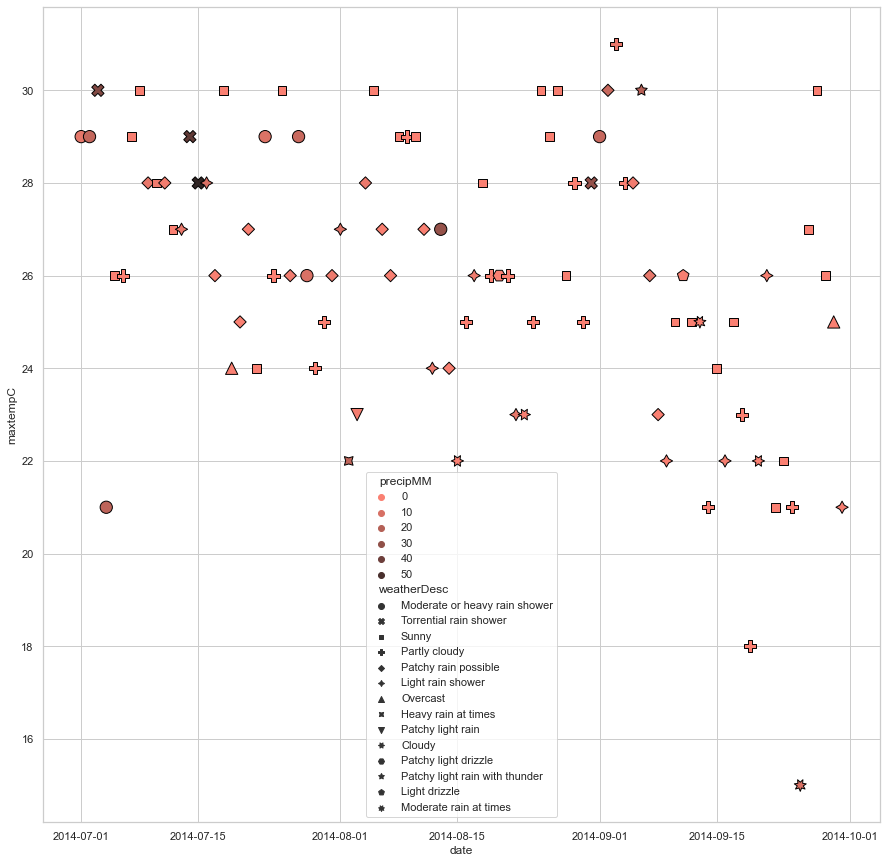

In [24]:
# Seaborn scatter plot
sns.scatterplot(data=weather_data, x="date", y="maxtempC", hue="precipMM", style="weatherDesc", s=150, palette="dark:salmon_r", edgecolor="black")
sns.set(rc={"figure.figsize":(17, 15)})
sns.set(style = "whitegrid")
# sns.color_palette("rocket", as_cmap=True)
plt.savefig('Figures/max Temp_date.png')
# plt.axis('equal')
plt.show()

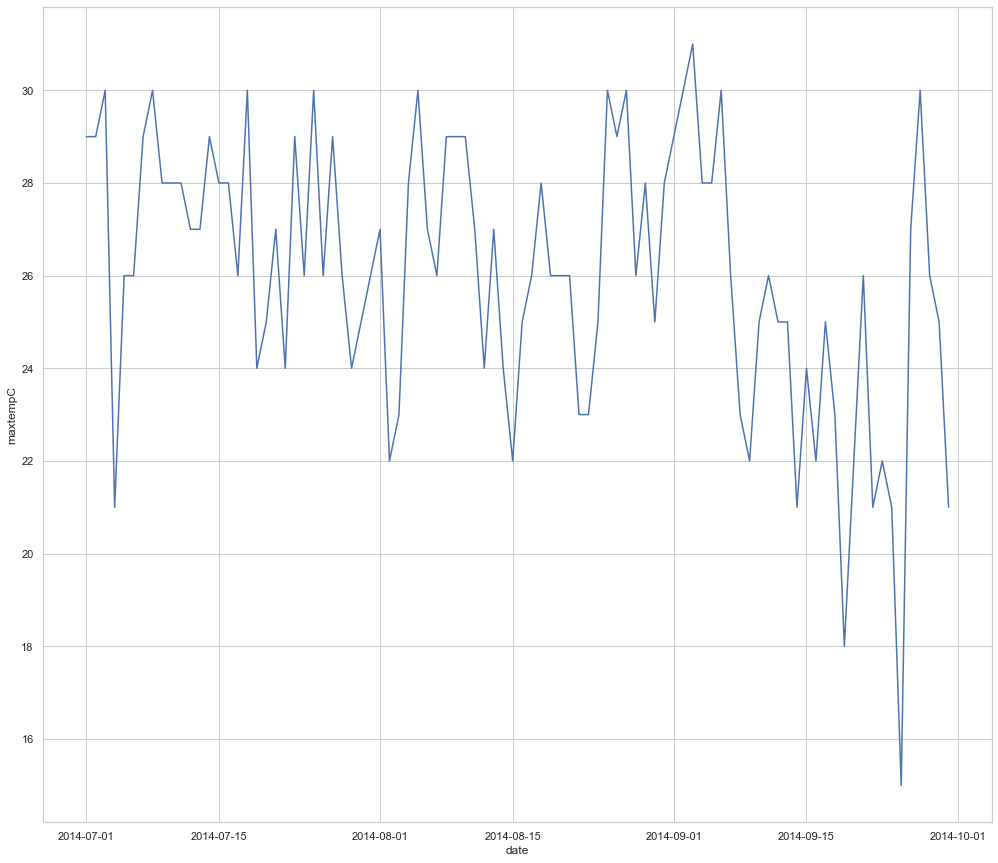

In [25]:
# Seaborn line plot
sns.lineplot(data=weather_data, x="date", y="maxtempC",  palette="dark:salmon_r")
sns.set(rc={"figure.figsize":(14, 12)})
sns.set(style = "whitegrid")
# plt.axis('equal')  style="weatherDesc"
plt.show()

# hue="precipMM", s=150, palette="dark:salmon_r"